In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
#%pylab

In [3]:
data = pd.read_csv('Borovcanin.csv', header=0)
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%y')
data.index = data.Date

In [5]:
data.head()

,Day,Month,Year,Date,Week,Day Of Week,Occupancy,Occupancy_%,Average_Daily_Rate,Average_Daily_Rate_%,Revenue_Per_Available_Room,Revenue_per_room_%,Supply,Supply_%,Demand,Demand_%,Revenue,Revenue_%,Number_Of_Hotels,Number_Of_Rooms
Date,,,,,,,,,,,,,,,,,,,,
2014-11-01,1,11,2014,2014-11-01,201444,Saturday,49.1,NaN,11640.03,NaN,5717.67,NaN,7286.0,NaN,3579.0,NaN,41658958.0,NaN,93,7286.0
2014-11-02,2,11,2014,2014-11-02,201445,Sunday,29.1,NaN,10659.37,NaN,3106.67,NaN,7286.0,NaN,2124.0,NaN,22635212.0,NaN,93,7286.0
2014-11-03,3,11,2014,2014-11-03,201445,Monday,41.2,NaN,12222.01,NaN,5029.64,NaN,7286.0,NaN,2998.0,NaN,36645940.0,NaN,93,7286.0
2014-11-04,4,11,2014,2014-11-04,201445,Tuesday,49.9,NaN,10941.91,NaN,5458.36,NaN,7286.0,NaN,3635.0,NaN,39769581.0,NaN,93,7286.0
2014-11-05,5,11,2014,2014-11-05,201445,Wednesday,61.2,NaN,12273.43,NaN,7515.91,NaN,7286.0,NaN,4462.0,NaN,54760921.0,NaN,93,7286.0


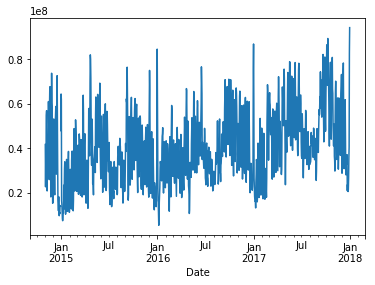

In [8]:
data.Revenue.plot()

In [9]:
Rev = data.Revenue

In [10]:
Rev

Date
2014-11-01    41658958.0
2014-11-02    22635212.0
2014-11-03    36645940.0
2014-11-04    39769581.0
2014-11-05    54760921.0
2014-11-06    56897207.0
2014-11-07    29949317.0
2014-11-08    20768492.0
2014-11-09    36420717.0
2014-11-10    42617831.0
2014-11-11    45880999.0
2014-11-12    44296640.0
2014-11-13    61013670.0
2014-11-14    51147587.0
2014-11-15    42466707.0
2014-11-16    25852543.0
2014-11-17    58833286.0
2014-11-18    66513258.0
2014-11-19    67723474.0
2014-11-20    64829890.0
2014-11-21    53122771.0
2014-11-22    18075555.0
2014-11-23    21073904.0
2014-11-24    54131260.0
2014-11-25    73766171.0
2014-11-26    60384879.0
2014-11-27    57963827.0
2014-11-28    23766588.0
2014-11-29    15220387.0
2014-11-30    15737738.0
                 ...    
2017-12-02    28737067.0
2017-12-03    32294926.0
2017-12-04    57302724.0
2017-12-05    62250072.0
2017-12-06    73702692.0
2017-12-07    78384230.0
2017-12-08    58167246.0
2017-12-09    36484053.0
2017-12-10    308046

In [11]:
# Autokorelaciona funkcija
from pandas.plotting import autocorrelation_plot


In [21]:
# provera da li postoje NaN vrednosti
sum(Rev.isnull())


1

In [16]:
sum (Rev.isnull() )

1

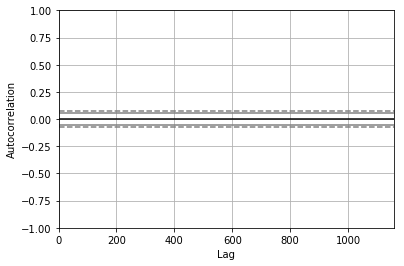

In [14]:
#autocorrelation_plot(np.random.randn(1000))
autocorrelation_plot(data.Revenue)

In [17]:
ind = Rev.isnull()

In [19]:
Rev[ind]

Date
2014-12-29   NaN
Name: Revenue, dtype: float64

In [20]:
Rev.values[ind]=0

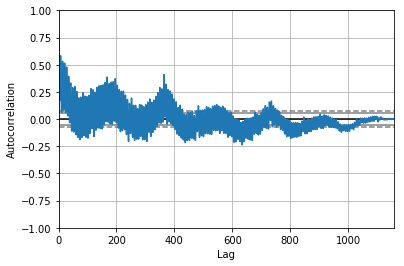

In [21]:
# sada mozemo nacrtati autokorelacionu funkciju
autocorrelation_plot(Rev)

In [22]:
train = Rev[:'2017-09']
test  = Rev['2017-10']
true_test = Rev['2017-11':]

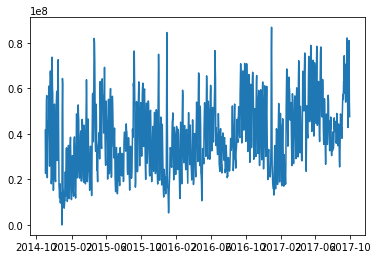

In [102]:
plt.plot(train)

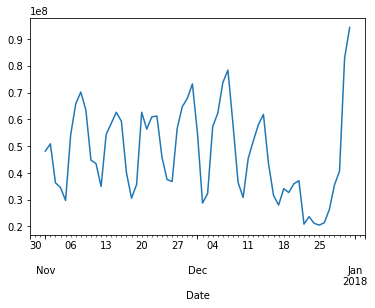

In [23]:
true_test.plot()

In [24]:
type(Rev.values[0])

numpy.float64

In [25]:
# testiranje AR modela

from statsmodels.tsa.ar_model import AR

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
model = AR(train)

In [28]:
model_fit =model.fit()

In [29]:
model.k_ar

22

In [30]:
predictions = model_fit.predict(start = len(train), end = len(train) + len(test)-1, dynamic =False)

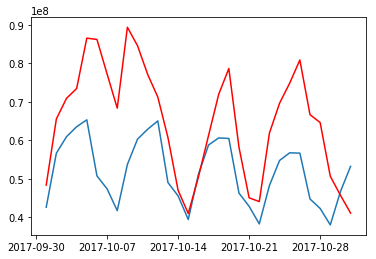

In [33]:
plt.plot(predictions)
plt.plot(test,'r')

In [34]:
# dekompozicija

from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
#result = seasonal_decompose (Rev, model= 'additive' )
result = seasonal_decompose (Rev, model= 'additive' , freq=365)

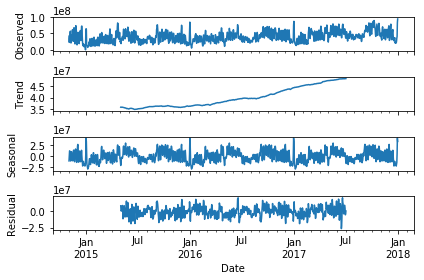

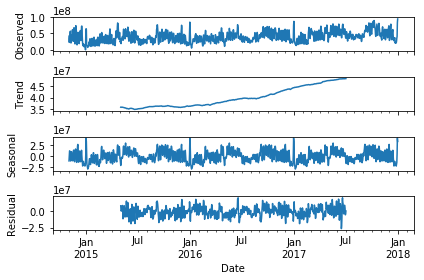

In [52]:
result.plot()

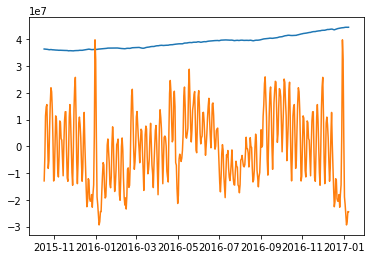

In [55]:
plt.plot(result.trend[350:800])
plt.plot(result.seasonal[350:800])
#plt.plot(result.resid[:100])

In [57]:
trend    = result.trend
seasonal = result.seasonal
resid    = result.resid

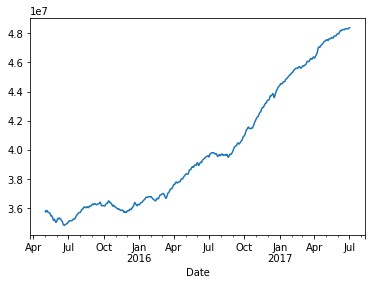

In [58]:
trend.plot()

In [60]:
x = np.arange(len(trend))

In [62]:
x

array([   0,    1,    2, ..., 1154, 1155, 1156])

In [68]:
sum(trend.isnull())

364

<Container object of 3 artists>

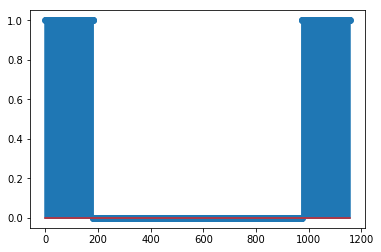

In [69]:
plt.stem(trend.isnull())

In [70]:
364/2

182.0

In [73]:
trend.values[181]

nan

In [79]:
trend_linear = trend.values[182:len(trend) - 182]

In [80]:
trend_linear.size

793

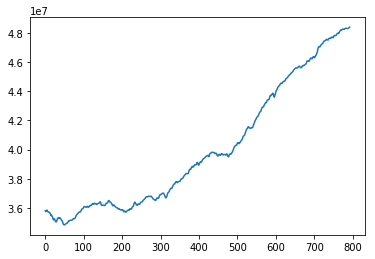

In [82]:
plt.plot(trend_linear)

In [94]:
x = np.arange(len(trend_linear))
x_oktobar = np.arange(len(x) + 182 + 30)
y = trend_linear

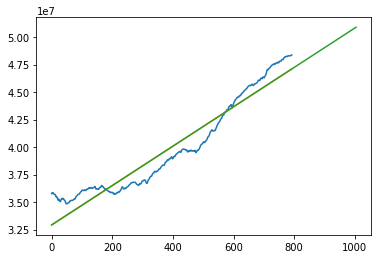

In [96]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
x = x.reshape(-1,1)
x_oktobar = x_oktobar.reshape(-1,1)
regr.fit(x,y)
pred = regr.predict(x)
pred_oktobar = regr.predict(x_oktobar)
plt.plot(trend_linear)
plt.plot(pred)
plt.plot(pred_oktobar)
plt.show()

In [86]:
train_trend = trend[:'2017-09']
test_trend  = trend['2017-10']
true_result_trend = trend['2017-11':]

In [89]:
model_trend = AR(train_trend)
model_fit = model_trend.fit()
predict_trend = model_fit.predict(start= len(train_trend), end = len(train_trend) + len(test_trend)-1, dynamic=False)

LinAlgError: SVD did not converge

In [97]:
from statsmodels.tsa.arima_model import ARIMA

In [103]:
ARIMA?

In [114]:
model = ARIMA(train.values, order=(5,2,2))
model_fit = model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [115]:
predictions_ARIMA = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


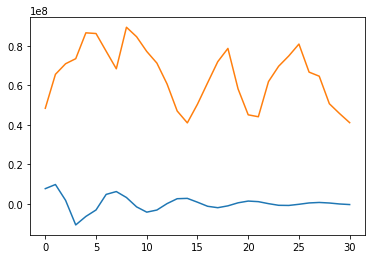

In [116]:
plt.plot(predictions_ARIMA)
plt.plot(test.values)

In [108]:
predictions_ARIMA

array([ 1458723.65714401, 10201881.33629578,  9460649.39923791,
        4160439.63737087, -5277728.48307489, -8118337.93883053,
       -5346538.94099072,   832158.95948587,  5274847.8544733 ,
        5458696.2273388 ,  1708298.36297198, -2538675.73524407,
       -4327224.45069592, -2794066.20594634,   417009.39848626,
        2812727.64822779,  2850568.52152599,   907696.3347353 ,
       -1337404.11326006, -2272010.36140951, -1467932.94044588,
         225714.81034209,  1482142.81618611,  1501986.98518032,
         478615.98596306,  -701795.91879396, -1192766.73041708,
        -768674.39333453,   122310.23905585,   782790.54608307,
         792453.1636771 ])

In [97]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



In [123]:
# tekuci primer koji se resava na casu

#history = list()
history = train.values
order = (3,2,0)
model = ARIMA(history, order)

model_fit = model.fit(disp=0)
predictions_arima = model_fit.predict ( start = len(train), end=len(train)+len(test)-1, dynamic=False )
#RMSE = sqrt ( mean_squared_error ( predictions_arima, test.values ))




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.95)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse


In [ ]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=17380950.106
ARIMA(0, 0, 1) RMSE=11423549.434
ARIMA(0, 1, 0) RMSE=10313772.888
ARIMA(0, 1, 1) RMSE=9807903.760
ARIMA(0, 1, 2) RMSE=9881367.579
ARIMA(0, 2, 0) RMSE=12386937.260
ARIMA(0, 2, 1) RMSE=10382370.528
ARIMA(0, 2, 2) RMSE=9901188.078
ARIMA(1, 0, 0) RMSE=9913625.910
ARIMA(1, 0, 1) RMSE=9210295.061
ARIMA(1, 0, 2) RMSE=8991270.899
ARIMA(1, 1, 0) RMSE=9905446.884
ARIMA(1, 1, 1) RMSE=9808545.310
ARIMA(1, 1, 2) RMSE=8918489.313
ARIMA(1, 2, 0) RMSE=12153437.261
ARIMA(2, 0, 0) RMSE=9150811.179
ARIMA(2, 0, 1) RMSE=9133232.582
ARIMA(2, 0, 2) RMSE=8964813.963
ARIMA(2, 1, 0) RMSE=9568202.426
ARIMA(2, 1, 1) RMSE=8299566.449
ARIMA(2, 2, 0) RMSE=12090869.141
ARIMA(4, 0, 0) RMSE=8459920.060
ARIMA(4, 0, 1) RMSE=8008575.348
ARIMA(4, 1, 0) RMSE=7997879.185
ARIMA(4, 1, 1) RMSE=7932509.870
ARIMA(4, 1, 2) RMSE=7868357.823
ARIMA(4, 2, 0) RMSE=10304903.345
ARIMA(6, 0, 0) RMSE=7937752.183
ARIMA(6, 0, 1) RMSE=7931269.135
ARIMA(6, 1, 0) RMSE=7920541.857
ARIMA(6, 1, 1) RMSE=7721645.577
